
## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import fidle.pwk as pwk

## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1) #Preciser le nombre de channel (1) le -1 = garder la même valeur que le tableau de base
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


In [8]:
print(type(x_train))

<class 'numpy.ndarray'>


## Step 3 - Preparing the data

In [9]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


### Have a look

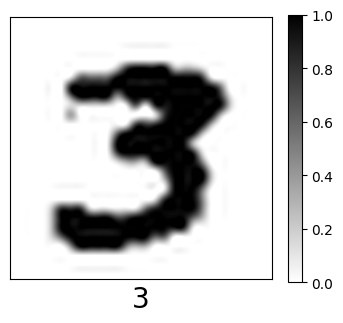

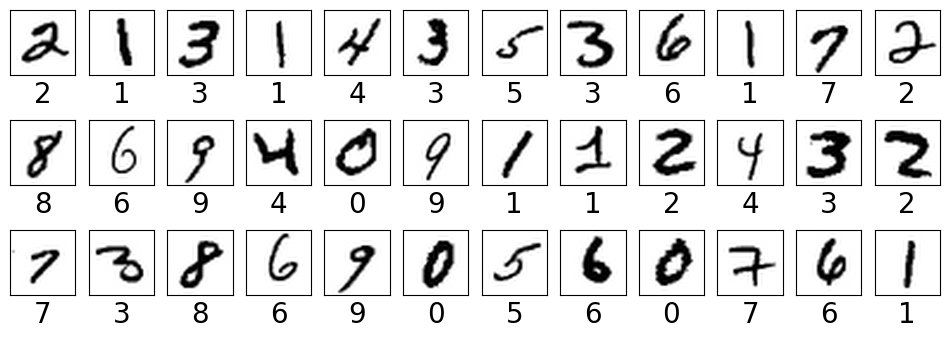

In [10]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [ ]:
#hidden1     = 100
#hidden2     = 100

model = keras.models.Sequential()

#model.add( keras.layers.Input((28,28,1))) #input layer

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu', input_shape = (28,28,1)) )#8 2dconvolutiv planes, kernel size 3*3
model.add( keras.layers.MaxPooling2D((2,2)))#reduce the image size on 4
# model.add( keras.layers.Dropout(0.2))#deactivate randomely some neuron outputs (regularization and avoid overfitting)

model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
# model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(100, activation='relu'))
# model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

model.compile(optimizer='adam',#function for get down the gradient
              loss='sparse_categorical_crossentropy',#loss function for classification
              metrics=['accuracy']) #the metric 

## Step 5 - Train the model

In [ ]:
print(x_train.shape)
print(y_train.shape)

In [ ]:
batch_size  = 512
epochs      =  16

%time

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))


## Step 6 - Evaluate
### 6.1 - Final loss and accuracy
Note : With a DNN, we had a precision of the order of : 97.7%

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

### 6.2 - Plot history

In [ ]:
pwk.plot_history(history,  plot={'Acc':['accuracy','val_accuracy'],'Loss':['loss','val_loss']})

### 6.3 - Plot results

In [ ]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
print(y_sigmoid)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

In [ ]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# import scikitplot as skplt 

print(classification_report(y_test,y_pred,digits = 4))
print(accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<div class="todo">
    Change the architecture of the network:
    <ul>
        <li>The input layer</li>
        <li>Three consecutive blocks with Conv(5x5, strides=1, padding=same)-Relu-MaxPooling(2x2, strides=2).
        Take 16 filters for the first Conv layer, 32 filters for the second and 64 for the third</li> 
        <li> Two dense layers of size 128 and 64, with ReLu activations
        dropout 30% of neurones and 50% of neurons foir each fully connected layer</li>
        <li> One dense layer with 10 units and a softmax activation</li>
    </ul>
    ->Run this architecture for 10 epochs and 600 batch size
</div>
### End